In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import pacf, acf

In [16]:
df = pd.read_csv('cayman_temperature.csv')

In [17]:
df['dt'] = pd.to_datetime(df['dt'], infer_datetime_format=True)

In [39]:
df['month'] = [t.month for t in df['dt']]

In [40]:
df

,dt,AverageTemperature,month
0,1823-01-01,24.006,1
1,1823-02-01,22.761,2
2,1823-03-01,25.235,3
3,1823-04-01,25.580,4
4,1823-05-01,27.315,5
...,...,...,...
2284,2013-05-01,28.253,5
2285,2013-06-01,28.393,6
2286,2013-07-01,28.441,7
2287,2013-08-01,28.457,8


<IPython.core.display.Javascript object>


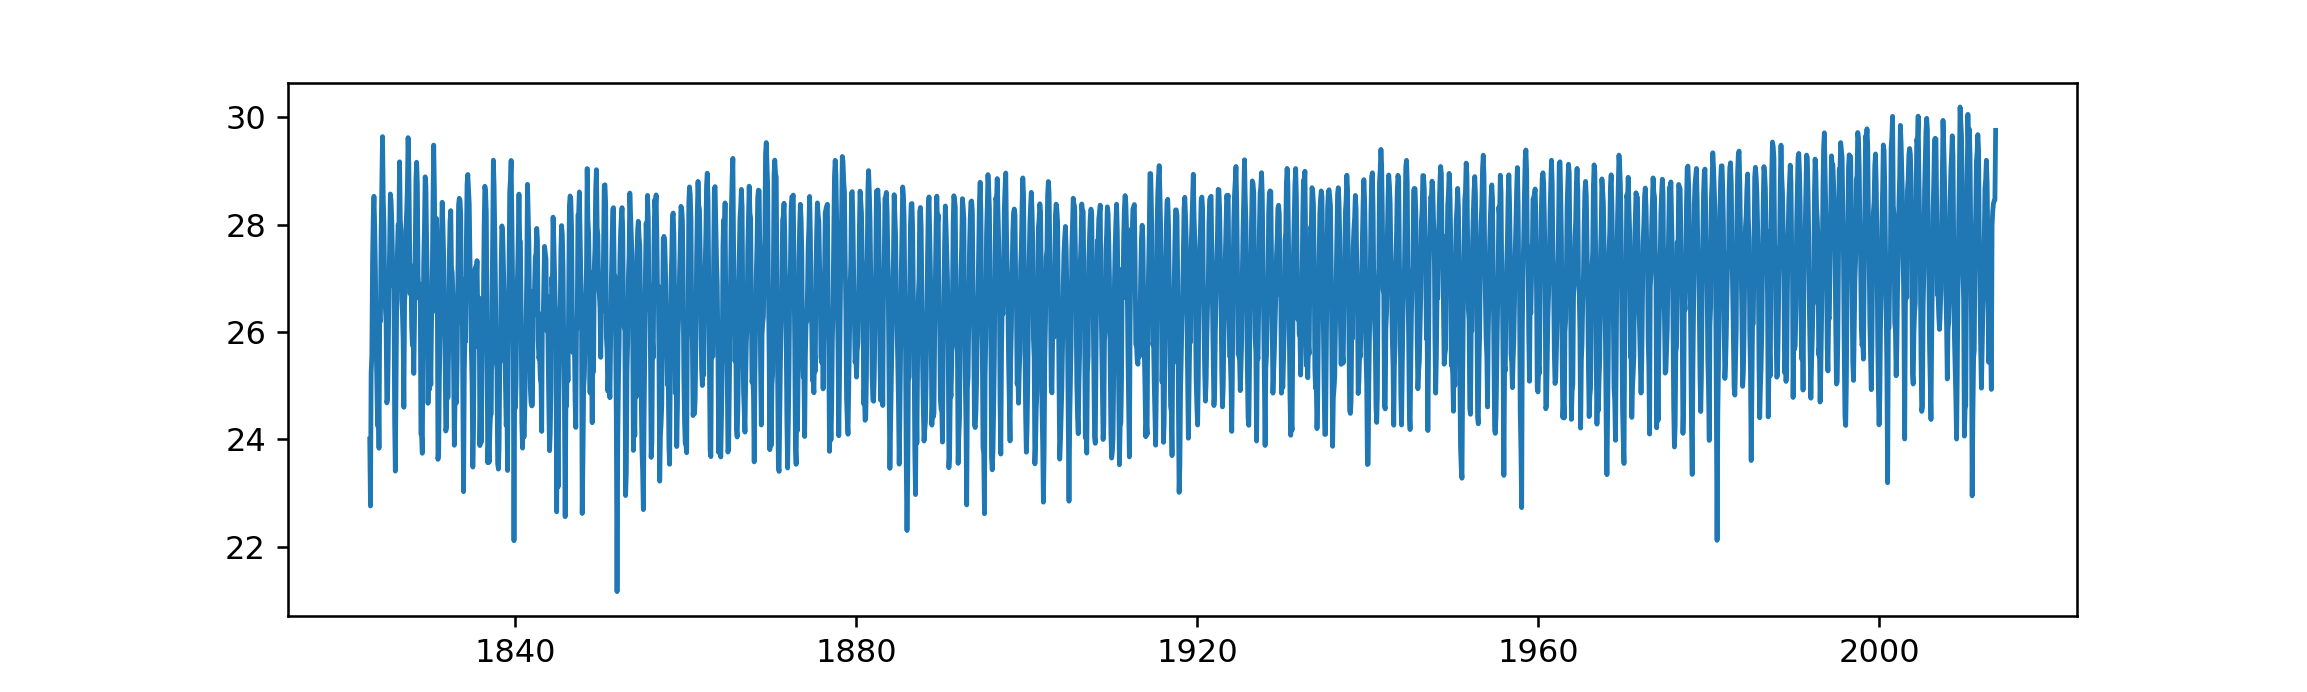

In [36]:
%matplotlib notebook
plt.figure(figsize=(10,3))
plt.plot(df['dt'], df['AverageTemperature'])
plt.show()

In [28]:
dataACF = acf(df['AverageTemperature'])
dataPACF = pacf(df['AverageTemperature'])

/opt/anaconda3/envs/py3qt5/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:657: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
/opt/anaconda3/envs/py3qt5/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(
/opt/anaconda3/envs/py3qt5/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1024: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs // 2 - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(


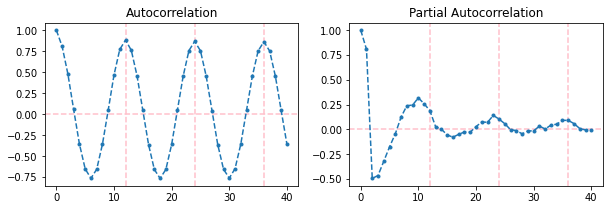

In [33]:
fig, ax = plt.subplots(ncols=2, figsize=(10,3))
ax[0].axhline(y=0, linestyle='--', color='pink')
ax[1].axhline(y=0, linestyle='--', color='pink')
for i in range(1,4):
    ax[0].axvline(x=12*i, linestyle='--', color='pink')
    ax[1].axvline(x=12*i, linestyle='--', color='pink')

ax[0].plot(dataACF, '.--')
ax[1].plot(dataPACF, '.--')
ax[0].set_title('Autocorrelation')
ax[1].set_title('Partial Autocorrelation')
plt.show()

## Fitting

In [47]:
df['monthSin'] = np.sin(2 * np.pi / 12 * (df['month']-1))
df['monthCos'] = np.cos(2 * np.pi / 12 * (df['month']-1))

In [48]:
df

,dt,AverageTemperature,month,monthSin,monthCos
0,1823-01-01,24.006,1,0.000000e+00,1.000000e+00
1,1823-02-01,22.761,2,5.000000e-01,8.660254e-01
2,1823-03-01,25.235,3,8.660254e-01,5.000000e-01
3,1823-04-01,25.580,4,1.000000e+00,6.123234e-17
4,1823-05-01,27.315,5,8.660254e-01,-5.000000e-01
...,...,...,...,...,...
2284,2013-05-01,28.253,5,8.660254e-01,-5.000000e-01
2285,2013-06-01,28.393,6,5.000000e-01,-8.660254e-01
2286,2013-07-01,28.441,7,1.224647e-16,-1.000000e+00
2287,2013-08-01,28.457,8,-5.000000e-01,-8.660254e-01
